In [1]:
# Datas e Horas
from datetime import datetime

# Manipulação de Dados
import numpy as np
import pandas as pd

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-Processamento
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Métricas de avaliação do modelo
from sklearn.metrics import precision_score, recall_score, roc_auc_score

# Processamento ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliação de Desempenho
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Lendo dataset
campus = pd.read_csv('campus.csv')

# Primeiras linhas
campus.head(100)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
96,97,F,76.00,Central,70.00,Central,Science,76.00,Comm&Mgmt,Yes,66.00,Mkt&Fin,64.44,Placed,300000.0
97,98,F,70.50,Central,62.50,Others,Commerce,61.00,Comm&Mgmt,No,93.91,Mkt&Fin,69.03,Not Placed,NaN
98,99,F,69.00,Central,73.00,Central,Commerce,65.00,Comm&Mgmt,No,70.00,Mkt&Fin,57.31,Placed,220000.0


### Estatísticas Descritivas

In [3]:
# Descrição
campus.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
# Avaliando dataset
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
#Dimensão do Dataset
campus.shape

(215, 15)

In [6]:
# Renomeando Colunas
campus.rename(
    columns={
        'sl_no' : 'serial', 
        'gender' : 'gênero', 
        'ssc_p' : 'ens_medio_p',
        'ssc_b' : 'conselho_em', 
        'hsc_p' : 'ens_tecnico_p', 
        'hsc_b' : 'conselho_et', 
        'hsc_s' : 'ens_medio_esp',
       'degree_p' : 'grau_p', 
       'degree_t' : 'grau_tipo', 
       'workex' : 'exp_trabalho', 
       'etest_p' : 'teste_emprego_p', 
       'specialisation' : 'especializacao', 
       'mba_p' : 'mba_p',
       'status' : 'status', 
       'salary' : 'salario'
    }, inplace=True
)

In [7]:
# Verificando alterações
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial           215 non-null    int64  
 1   gênero           215 non-null    object 
 2   ens_medio_p      215 non-null    float64
 3   conselho_em      215 non-null    object 
 4   ens_tecnico_p    215 non-null    float64
 5   conselho_et      215 non-null    object 
 6   ens_medio_esp    215 non-null    object 
 7   grau_p           215 non-null    float64
 8   grau_tipo        215 non-null    object 
 9   exp_trabalho     215 non-null    object 
 10  teste_emprego_p  215 non-null    float64
 11  especializacao   215 non-null    object 
 12  mba_p            215 non-null    float64
 13  status           215 non-null    object 
 14  salario          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
# Verificando missings
campus.isna().sum()

serial              0
gênero              0
ens_medio_p         0
conselho_em         0
ens_tecnico_p       0
conselho_et         0
ens_medio_esp       0
grau_p              0
grau_tipo           0
exp_trabalho        0
teste_emprego_p     0
especializacao      0
mba_p               0
status              0
salario            67
dtype: int64

In [9]:
# Removendo coluna Serial
campus = campus.drop(['serial'], axis=1)

<Axes: >

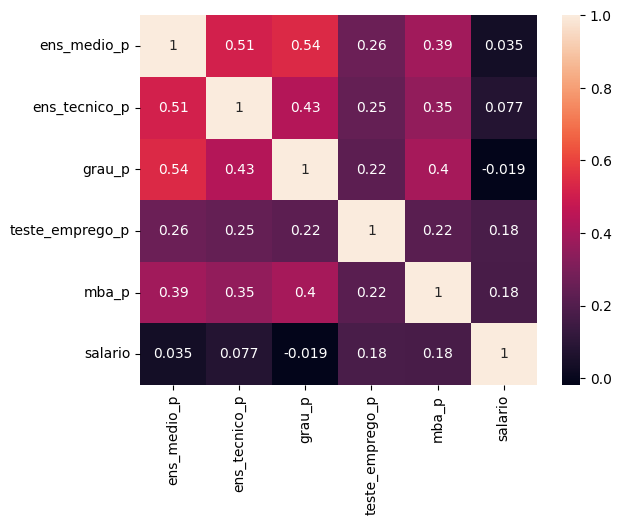

In [10]:
# Verificando a correlação entre as tabelas
sns.heatmap(campus.corr(numeric_only = True), annot = True)

In [29]:
#
campus['salario'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salario, dtype: float64

### Análise Exploratória dos Dados

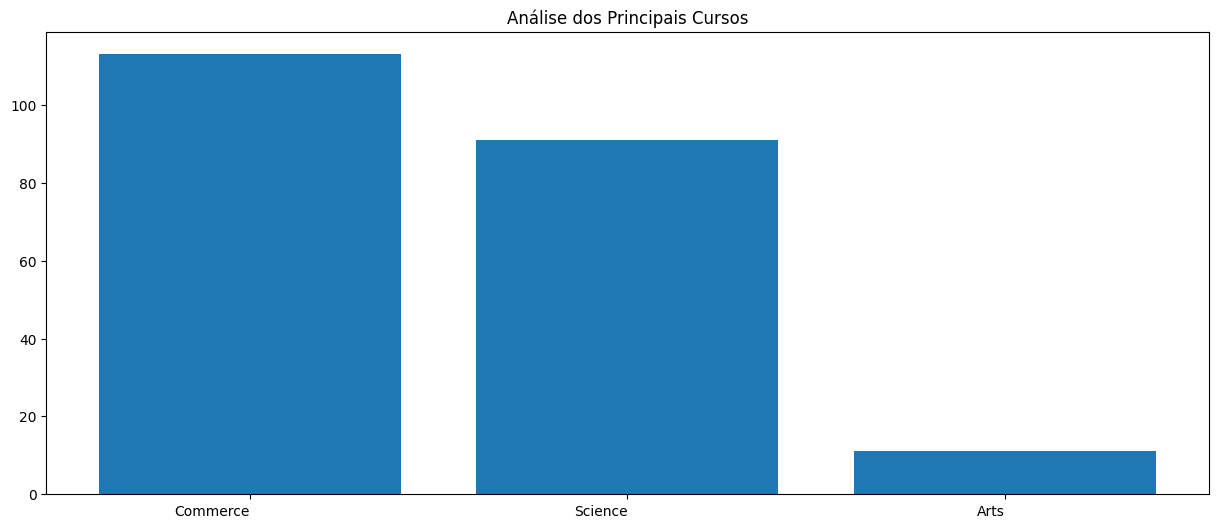

In [11]:
# Gráficos de Análise dos Setores
plt.figure(figsize=(15,6))
plt.title('Análise dos Principais Cursos')
plt.bar(campus['ens_medio_esp'].value_counts().index, campus['ens_medio_esp'].value_counts());
plt.xticks(ha='right');

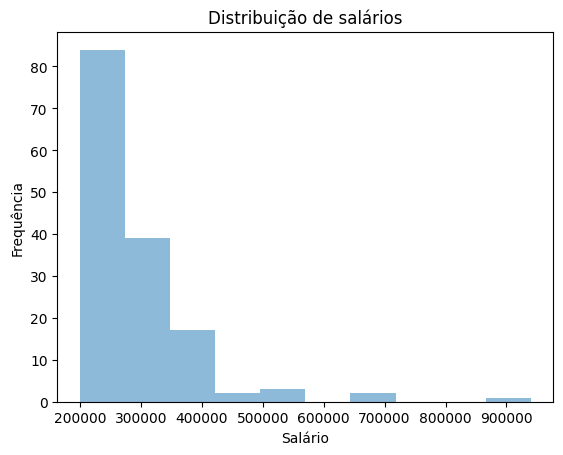

In [12]:
# Cria um histograma usando a biblioteca Matplotlib
plt.hist(campus['salario'], bins=10, alpha=0.5, color='#1f77b4')

# Adiciona um rótulo ao eixo x
plt.xlabel('Salário')

# Adiciona um rótulo ao eixo y
plt.ylabel('Frequência')

# Adiciona um título ao gráfico
plt.title('Distribuição de salários')

# Exibe o gráfico na tela
plt.show()

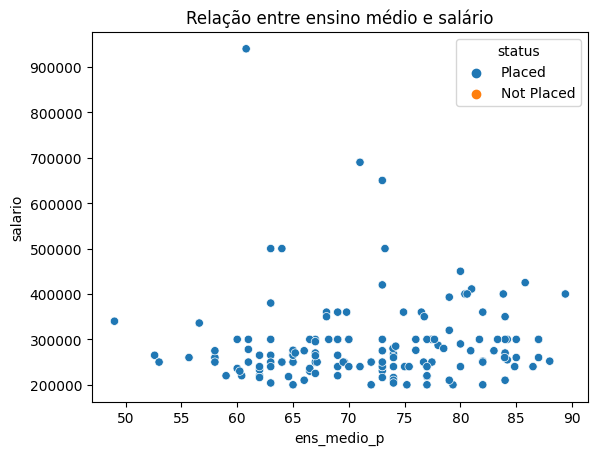

In [13]:
# Cria um gráfico de dispersão usando a biblioteca Seaborn
sns.scatterplot(data=campus, x='ens_medio_p', y='salario', hue='status')

# Adiciona um título ao gráfico
plt.title('Relação entre ensino médio e salário')

# Exibe o gráfico na tela
plt.show()

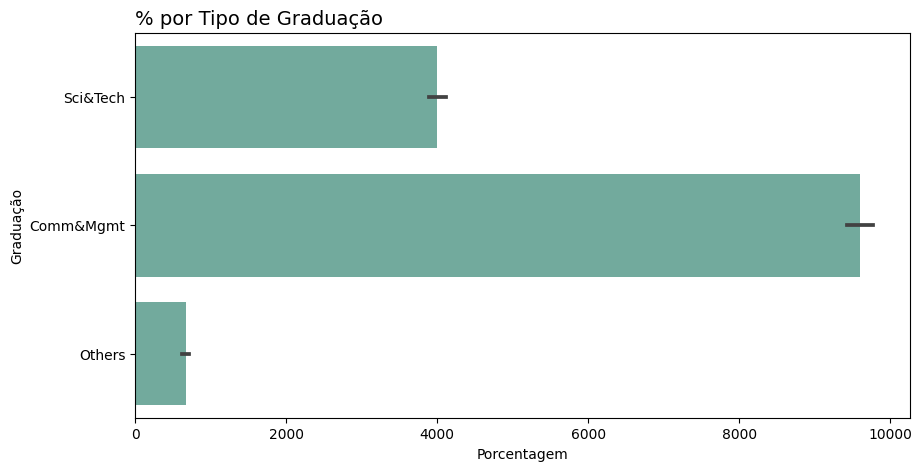

In [14]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('% por Tipo de Graduação', loc='left', fontsize=14 )

# Grafico
sns.barplot( data=campus, x='grau_p', y='grau_tipo',color='#69b3a2', estimator=sum )

# Label
plt.ylabel('Graduação');
plt.xlabel('Porcentagem');

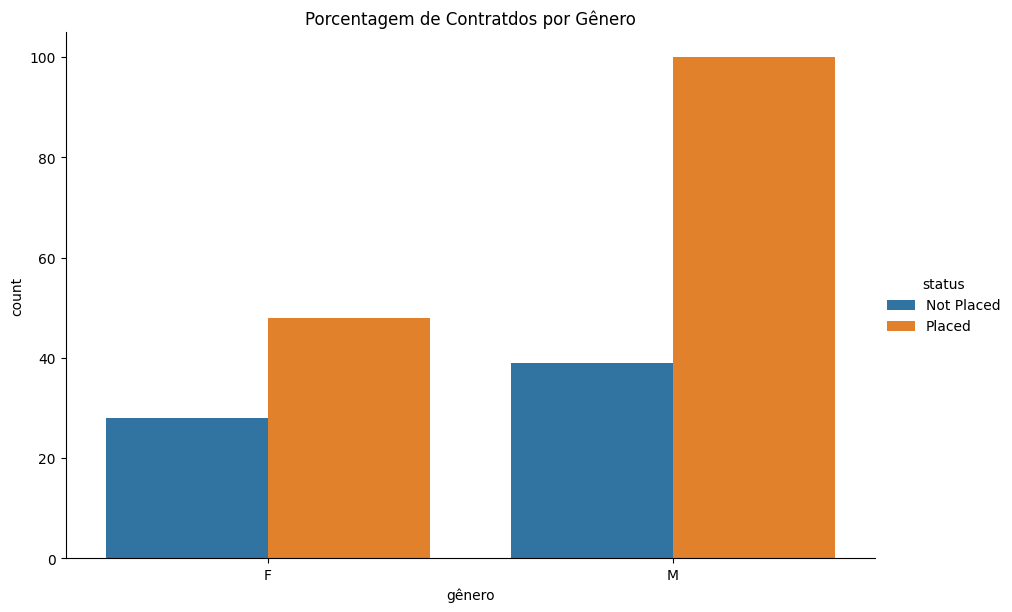

In [17]:
# Agrupe os dados por gênero e status e conte o número de ocorrências em cada grupo
dados_agrupados = campus.groupby(['gênero', 'status']).size().reset_index(name='count')

# Crie o gráfico de barras
sns.catplot(data=dados_agrupados, x='gênero', y='count', hue='status', kind='bar', palette=['#1f77b4', '#ff7f0e'], 
            height=6, aspect=1.5)
plt.title('Porcentagem de Contratdos por Gênero')
plt.show()

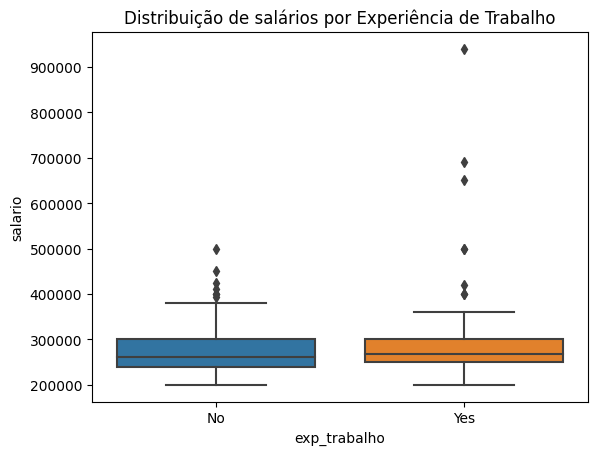

In [21]:
# Cria um boxplot usando a biblioteca Seaborn
sns.boxplot(data=campus, x='exp_trabalho', y='salario')

# Adiciona um título ao gráfico
plt.title('Distribuição de salários por Experiência de Trabalho')

# Exibe o gráfico na tela
plt.show()

#### MODELAGEM DE MACHINE LEARNING
Separação dos dados de treino e teste

In [48]:
# Vamos listar as features que vamos utilizar
features = ['gênero', 'conselho_em', 'conselho_et', 'ens_medio_p', 'ens_tecnico_p', 'ens_medio_esp', 'grau_p', 'grau_tipo', 'status', 'exp_trabalho', 'teste_emprego_p', 'especializacao', 'mba_p' ]

target = "salario"

In [49]:
# Agora, dividimos antes de qualquer pré-processamento
X = campus[features]  # Features
y = campus[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [50]:
campus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gênero           215 non-null    object 
 1   ens_medio_p      215 non-null    float64
 2   conselho_em      215 non-null    object 
 3   ens_tecnico_p    215 non-null    float64
 4   conselho_et      215 non-null    object 
 5   ens_medio_esp    215 non-null    object 
 6   grau_p           215 non-null    float64
 7   grau_tipo        215 non-null    object 
 8   exp_trabalho     215 non-null    object 
 9   teste_emprego_p  215 non-null    float64
 10  especializacao   215 non-null    object 
 11  mba_p            215 non-null    float64
 12  status           215 non-null    object 
 13  salario          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
# Precisamos tratar as variáveis categóricas (Cuidado quando for numérica)
cat_features = []
num_features = []

In [ ]:
# cria um modelo de classificação usando CatBoost
model = campus.CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, loss_function='MultiClass')

# treina o modelo
model.fit(X_train, y_train, eval_set=(X_test, y_test))

### Pré-processamento

In [45]:
# Tipos de Dados
campus.dtypes.value_counts()

object     8
float64    6
Name: count, dtype: int64

In [39]:
max_valor = campus["salario"].max()  # encontra o valor máximo
df_campus = campus[campus["salario"] != max_valor]  # cria um novo dataframe excluindo as linhas com o valor máximo